# Interactive lecture : Floating-point arithmetic and pseudo-random numbers

*April, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

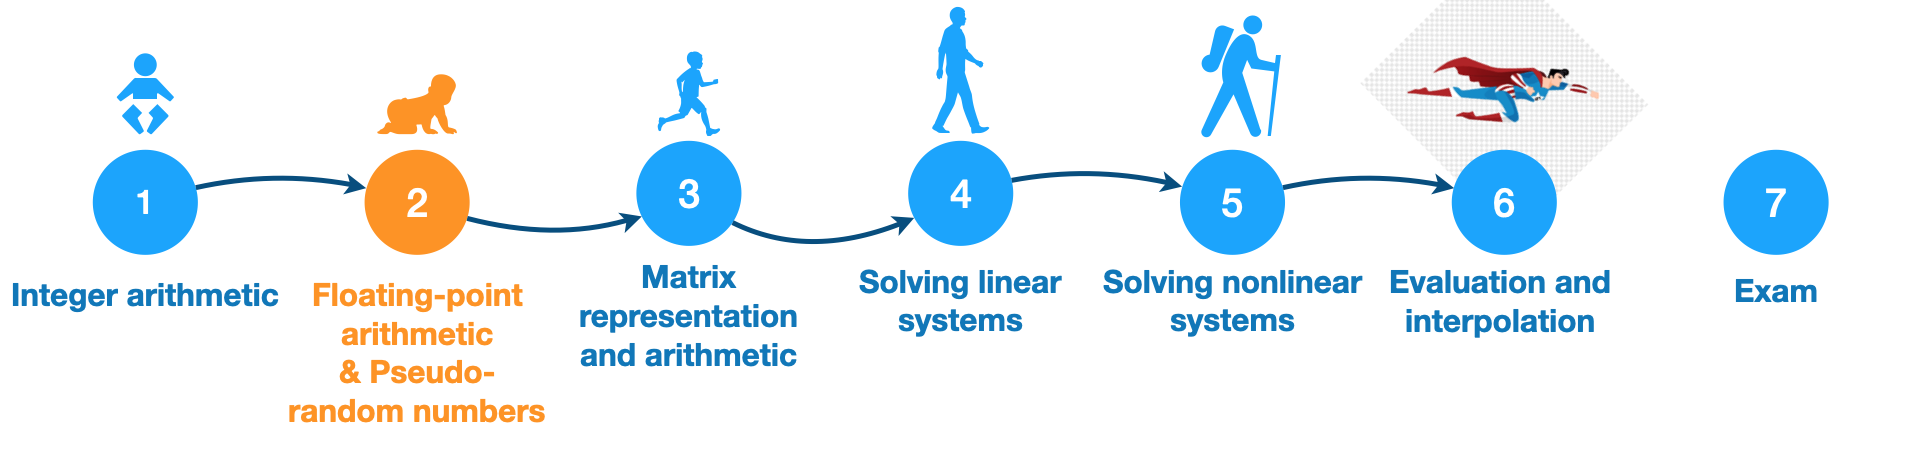

# Table of contents

- [Part 1: floating-point numbers](#1)


- [Part 2: pseudo-random numbers](#2)

    - [Exercice 1](#E1) (optional)
    - [Exercice 2](#E2)
    - [Exercice 3](#E3) (optional)
    - [Exercice 4](#E4)
    - [Exercice 5](#E5)

# PART 1: floating-point arithmetic and representation <a name="1"></a>

## Interactive introduction

what happens with the following code ?

- with integers:

In [1]:
a = 1 + 2
b = 3
print(a == b)

True


- with floats:

In [2]:
a = 0.1 + 0.2
b = 0.3

print(a == b)

False


## 1. Floating-point numbers

A (normalized) floating-point number $x\in \mathbb{F}$ is a number which is written in the form

$$
x = \pm x_0. x_1\cdots x_{p-1} \times b^e, \quad \quad 0 \leq x_i \leq b-1, \quad \quad x_0\neq 0
$$

with 
- b: the base
- p: the precision
- e: exponent

We call $x_0. x_1\cdots x_{p-1}$ the mantissa

**Machine precision:** $\varepsilon = b^{1-p}$

## 2. IEE 754 standard

The IEEE Standard for Floating Point Arithmetic (IEEE 754) is a technical standard for floating point computing that was established in 1985 by the Institute of Electrical and Electronics Engineers (IEEE). The standard addressed many of the problems encountered in various floating point implementations that made them difficult to use reliably and reduced their portability. IEEE Standard 754 floating point is the most common representation for real numbers on computers today.

In the **IEEE standard**:

- the base is binary, i.e. $b = 2$

- normalization is used, i.e. leading digit $x_0$ is always nonzero unless the number is zero.

The IEEE standard stores the **sign, exponent, and mantissa** in separate fields each of which has a fixed number of bits. The two most commonly used levels of precision for floating-point numbers are **single** precision and **double** precision. 

| Precision | Sign (bits) | Exponent (bits) | Mantissa (bits) |
| :- | -: | :-: | :-: |
| Single (32 bits) | 1 | 8 | 23
| Double (64 bits) | 1 | 11 | 52

## 3. Rounding errors


Approximation of $\mathbb{R}$ by $\mathbb{F}$, **rounding $r : \mathbb{R}\to \mathbb{F}$**

Let $x \in \mathbb{R}$ then

$$
r(x) = x\times (1+\delta ), \quad\quad |\delta|\leq \varepsilon/2
$$

In the **IEEE standard**:

- The arithmetic operations $\left( +, -, \times, / , \sqrt{\cdot} \right)$ are performed as if they were calculated in infinite precision and then rounded off
- By default, rounded to nearest

Let $x, y \in\mathbb{F}$,

$$
r(x \odot y) = (x\odot y)\times (1+\delta ), \quad\quad |\delta|\leq \varepsilon/2, \quad\quad \odot\in\left( +, -, \times, / , \sqrt{\cdot} \right)
$$

At each rounding, we lose a bit of accuracy, we talk about **rounding error**: even if an isolated operation returns the best possible result (rounding of the
exact result), a series of calculations can lead to large errors due to the
**accumulation of rounding errors**.

In [3]:
((((((4**0.5)**0.5)**0.5)**2)**2))**2

3.9999999999999982

## 4. Cancellation and absorption

The two main sources of rounding error during calculations are **cancellation** and **absorption**.

### Example of cancellation

Let us define the function 
$$
f(x) = \frac{1 - \cos(x)}{x^2}
$$
Then $f(x) \to  1/2$ when $x\to 0$.

In [4]:
import numpy as np

def f(x):
    return(1 - np.cos(x))/(x**2)

print(f(1.2e-5))
print(f(1.2e-6))
print(f(1.2e-7))
print(f(1.2e-8)) # the cosine rounded to 10 significant digits is equal to 0.9999999999
print(f(1.2e-9))
print(f(1.2e-10))

0.4999997329749008
0.4999858551870931
0.5011423375044111
0.7709882115452477
0.0
0.0


An absurd convergence !

In [5]:
print(np.cos(1.2e-8))
print(np.cos(1.2e-9))

0.9999999999999999
1.0


### Example of absorption

Let us compute $\sum_{i=1}^{N}\frac{1}{i}$

In [6]:
N = 1.e+6

In [7]:
# in ascending order - operation "big number -> small number"
asc = 0
for i in np.arange(1, N):
    asc += 1/i
asc

14.39272572286499

In [8]:
# in descending order - operation "small number -> big number"
des = 0
for i in np.arange(N-1, 0, -1):
    des += 1/i
des

14.392725722865773

In [9]:
des - asc # absorption effect with "asc"

7.833733661755105e-13

- For a floating-point single precision (32 bits) we have (C program, Pentium 4 processor):



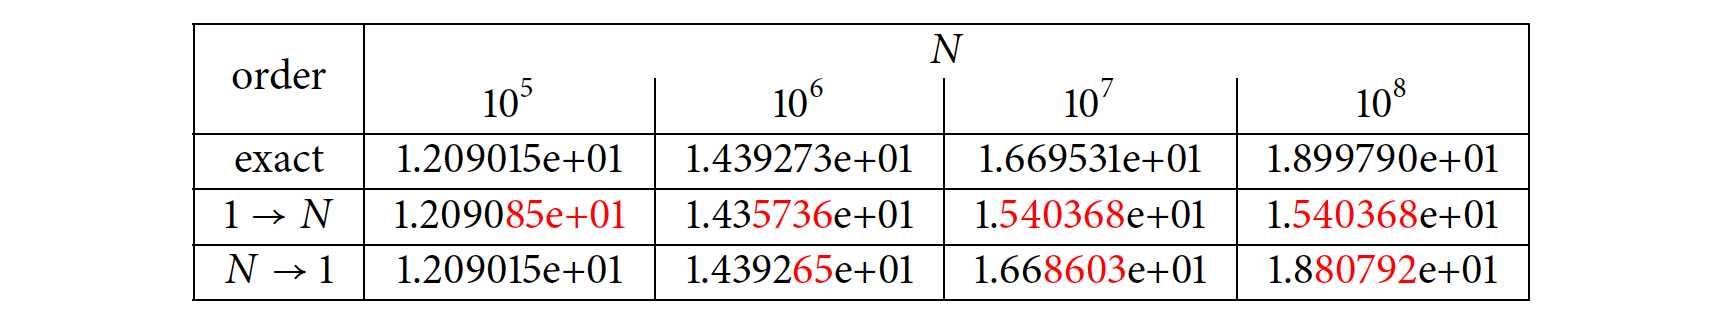

# PART 2: Random numbers and exercices

## 1. "True" and pseudo-random numbers

Two ways to generate random numbers:

- **measuring a physical phenomenon** assumed to be random: throwing dices, measuring some external natural phenomenon. Mainly two problems:
    - not practical: can be very slow;
    - physical phenomena and tools used to measure them generally biased that make their outcomes not uniformly random.


- **using computational algorithms** that can generate long sequences of "seemingly" random numbers. These numbers are called **pseudo-random** numbers because they are determined by a shorter initial value, known as a **seed value**. This type of algorithm is called seudo-random generator and this is what we usually use in practice.

Most computer-generated random numbers use PRNGs (Pseudo Random Number Generator), which are algorithms that can automatically create long series of numbers with good random properties, but the sequence eventually repeats itself. These random numbers are suitable for many situations, but we have to keep in mind that they are pseudo-random and require a seed. The most used PRNG is the linear congruential generator, which uses the recurrence

$$
x_{i+1} = (a x_i + b)\quad \textrm{mod}\, m
$$

to generate numbers, where $a$, $b$ and $m$ are large integers, and $x_{{i+1}}$ is the next pseudo random number after $x_i$.

Probably the most widely known tool for generating random data in Python is its random module, which uses the [**Mersenne Twister**](https://en.wikipedia.org/wiki/Mersenne_Twister) (1997) PRNG algorithm as its core generator.

## 2. Example of a BAD pseudo-random generator  <a name="2"></a>


**RANDU** is a linear congruential pseudo-random number generator (LCG) which was used primarily in the 1960s and 1970s. The congruent generator RANDU, defined by the recursion (on the set of integers $\{1, \cdots, 2^{31}-1\}$)

$$
x_i = 65539\times x_{i-1} \quad \text{mod}\  2^{31}
$$

and $u_i = x_i/2^{31} \in (0, 1)$ has gained a reputation as the worst generator ever used in practice. The aim of this sequence of exercices is to check that this reputation is not usurped.



### [optional] Exercice 1   <a name="E1"></a>

Show that the triplets $(u_i, u_{i-1}, u_{i-2})$ are necessarily found on 15 hyperplanes in $[0, 1]^3$. **Hint:** $65539 = 2^{16}+3$.

### Exercice 2
   <a name="E2"></a>

1. Program this generator


2. generate 20000 points, and plot $u_i$ according to $u_{i-2}$ for all $i$ such that $0.5 \leq u_{i-1} \leq 0.51$. 


3. What are your observations ?

### [optional] Exercice 3
   <a name="E3"></a>

Plot the triplets $(u_i, u_{i-1}, u_{i-2})$ in 3 dimensions for illustrating the exercice 1.


### Exercice 4   <a name="E4"></a>

Another shortcoming of RANDU is the low period of the least significant bits of xi. Highlight this phenomenon.

### Exercice 5   <a name="E5"></a>

Numerically verify that the default generator in python has better properties than RANDU. (Think of different ways to test a uniform generator).